In [1]:
# Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
# [Step 1] Load the processed datasets
PoliceKillingUS = pd.read_csv('../processed_datasets/ProcessedPoliceKillingUS.csv', encoding='utf-8') 
PoliceKillingUS = PoliceKillingUS[PoliceKillingUS['date'] == 2015]  # Filter for 2015
PoliceKillingUS.head() 

,state,count,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,percentage
0,AK,4,2015,shot,gun,33.0,M,N,Fairbanks,False,attack,Car,False,0.403633
1,AL,17,2015,shot,gun,36.0,M,W,Arab,False,attack,Not fleeing,False,1.715439
2,AR,5,2015,shot,gun,31.0,M,W,Cabot,False,attack,Not fleeing,False,0.504541
3,AZ,42,2015,shot,gun,28.0,M,W,Phoenix,False,attack,Not fleeing,False,4.238143
4,CA,189,2015,shot,gun,27.0,M,H,Los Angeles,False,attack,Not fleeing,False,19.071645


In [3]:
PovertyUS = pd.read_csv('../processed_datasets/ProcessedPovertyUS.csv', encoding='utf-8')
PovertyUS = PovertyUS[PovertyUS['Year'] == 2015]  # Filter for 2015 data
PovertyUS.head()

,Unnamed: 0,Year,ID,Name,Poverty Universe,Number in Poverty,90% Confidence Interval,Percent in Poverty,90% Confidence Interval.1
0,209,2015,1000,AL,4736374,875853,"859,781 to 891,925",18.5,18.2 to 18.8
1,210,2015,2000,AK,720764,74941,"71,399 to 78,483",10.4,9.9 to 10.9
2,211,2015,4000,AZ,6671708,1159046,"1,136,666 to 1,181,426",17.4,17.1 to 17.7
3,212,2015,5000,AR,2887336,540733,"528,756 to 552,710",18.7,18.3 to 19.1
4,213,2015,6000,CA,38398077,5896255,"5,844,717 to 5,947,793",15.4,15.3 to 15.5


In [4]:
# [Step 2] Merge the datasets on 'state' and 'Name'
Joined = pd.merge(PoliceKillingUS, PovertyUS, left_on='state', right_on='Name', how='outer')
Joined.fillna(0, inplace=True)  # Replace missing values with 0
Joined.loc[Joined['state'] == 0, 'state'] = Joined.loc[Joined['state'] == 0, 'Name']  # Replace missing state names
Joined.to_csv('./Joined.csv', index=False)  # Save the joined dataset for reference
Joined.head()

,state,count,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,...,percentage,Unnamed: 0,Year,ID,Name,Poverty Universe,Number in Poverty,90% Confidence Interval,Percent in Poverty,90% Confidence Interval.1
0,AK,4.0,2015.0,shot,gun,33.0,M,N,Fairbanks,False,...,0.403633,210,2015,2000,AK,720764,74941,"71,399 to 78,483",10.4,9.9 to 10.9
1,AL,17.0,2015.0,shot,gun,36.0,M,W,Arab,False,...,1.715439,209,2015,1000,AL,4736374,875853,"859,781 to 891,925",18.5,18.2 to 18.8
2,AR,5.0,2015.0,shot,gun,31.0,M,W,Cabot,False,...,0.504541,212,2015,5000,AR,2887336,540733,"528,756 to 552,710",18.7,18.3 to 19.1
3,AZ,42.0,2015.0,shot,gun,28.0,M,W,Phoenix,False,...,4.238143,211,2015,4000,AZ,6671708,1159046,"1,136,666 to 1,181,426",17.4,17.1 to 17.7
4,CA,189.0,2015.0,shot,gun,27.0,M,H,Los Angeles,False,...,19.071645,213,2015,6000,CA,38398077,5896255,"5,844,717 to 5,947,793",15.4,15.3 to 15.5


In [ ]:
Joined['Log Poverty'] = np.log1p(Joined['Number in Poverty']) # Numbers in poverty, net numbers with logarithmic normalization
Joined['Log Killings'] = np.log1p(Joined['count']) # Number of killings, net numbers with logarithmic normalization
Joined.head()

,state,count,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,...,Year,ID,Name,Poverty Universe,Number in Poverty,90% Confidence Interval,Percent in Poverty,90% Confidence Interval.1,Log Poverty,Log Killings
0,AK,4.0,2015.0,shot,gun,33.0,M,N,Fairbanks,False,...,2015,2000,AK,720764,74941,"71,399 to 78,483",10.4,9.9 to 10.9,11.224470,1.609438
1,AL,17.0,2015.0,shot,gun,36.0,M,W,Arab,False,...,2015,1000,AL,4736374,875853,"859,781 to 891,925",18.5,18.2 to 18.8,13.682955,2.890372
2,AR,5.0,2015.0,shot,gun,31.0,M,W,Cabot,False,...,2015,5000,AR,2887336,540733,"528,756 to 552,710",18.7,18.3 to 19.1,13.200683,1.791759
3,AZ,42.0,2015.0,shot,gun,28.0,M,W,Phoenix,False,...,2015,4000,AZ,6671708,1159046,"1,136,666 to 1,181,426",17.4,17.1 to 17.7,13.963109,3.761200
4,CA,189.0,2015.0,shot,gun,27.0,M,H,Los Angeles,False,...,2015,6000,CA,38398077,5896255,"5,844,717 to 5,947,793",15.4,15.3 to 15.5,15.589828,5.247024


In [6]:
# [Step 4] Select the features for clustering
X = Joined[['Log Poverty', 'Log Killings']]

In [7]:
# [Step 5] Normalize the data using z-score normalization
xV1 = zscore(X.iloc[:, 0])
xV2 = zscore(X.iloc[:, 1])
X = np.transpose(np.array([xV1, xV2]))
print(X)

[[-1.73950553 -0.90171862]
 [ 0.4801407   0.38397435]
 [ 0.04472087 -0.71871968]
 [ 0.73307808  1.25803814]
 [ 2.20176381  2.74938246]
 [ 0.16004803  0.89669787]
 [-0.30306041 -1.41444215]
 [-1.3672437  -0.90171862]
 [-1.34775314 -1.12569123]
 [ 1.62973142  1.60901105]
 [ 1.08198934  0.89669787]
 [-1.11848011 -1.41444215]
 [-0.30653745 -0.71871968]
 [-0.6937591  -0.42996876]
 [ 1.0800708   0.5853906 ]
 [ 0.52887376  0.48972631]
 [-0.30748403 -0.20599615]
 [ 0.38281107  0.32660357]
 [ 0.4903834   0.82744866]
 [ 0.34303412 -0.20599615]
 [ 0.11324201  0.26575371]
 [-0.9932906  -1.41444215]
 [ 0.98042097  0.32660357]
 [ 0.05429727  0.05734289]
 [ 0.4799871   0.5853906 ]
 [ 0.19536321 -0.31174812]
 [-1.14588187 -0.90171862]
 [ 1.02824411  0.67272526]
 [-1.69631735 -1.8214137 ]
 [-0.74814022 -0.31174812]
 [-1.40713414 -1.12569123]
 [ 0.54968967  0.26575371]
 [-0.21542631  0.53869775]
 [-0.17309213  0.48972631]
 [ 1.58735982  0.48972631]
 [ 1.06308619  0.89669787]
 [ 0.15133188  0.99236216]
 

In [8]:
# [Step 6] Determine the number of clusters
numberOfRows, numberOfColumns = X.shape
k = int(input(f"Enter the number of clusters for K-means (from 2 to {numberOfRows}): "))
print(f"Number of clusters: {k}")

Number of clusters: 3


In [9]:
# [Step 7] Apply K-Means clustering
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
IDX = kmeans.labels_  # Get the labels of each cluster
print(IDX)

[1 0 0 0 2 0 1 1 1 2 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 0 0 1 0 1 0 2 0 0 1 0 0 0 1]


In [10]:
C = kmeans.cluster_centers_  # Get the cluster centers
print(C)

[[ 0.42152598  0.37676571]
 [-1.20173165 -1.15687203]
 [ 1.91295832  2.1511499 ]]


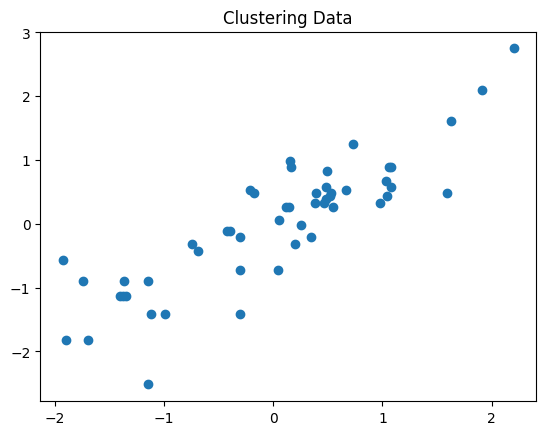

In [11]:
# [Step 8] Plotting the data points and clusters
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1])  # Plot all data without clustering
plt.title("Clustering Data")
plt.show()

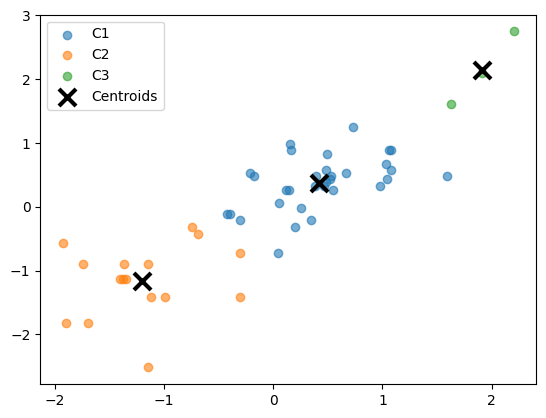

In [12]:
# [Step 9] Plot each cluster with different colors
colors = ['limegreen', 'yellow', 'c', 'purple']
for i in range(k):
    plt.scatter(X[IDX == i, 0], X[IDX == i, 1], label=f'C{i+1}', alpha=0.6)

# [Step 10] Plot the centroids
plt.scatter(C[:, 0], C[:, 1], marker='x', color='black', s=150, linewidth=3, label="Centroids", zorder=10)
plt.legend()
plt.show()

In [13]:
"""
    Draw the SSE Plot
"""
def plot_sse(max_clusters=10):
    # [Step 12.1] Calculate the SSE for different numbers of clusters
        sse = []
        for k in range(1, max_clusters + 1):
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
            kmeans.fit(X)
            sse.append(kmeans.inertia_)

        # [Step 12.2] Plot SSE vs. number of clusters to determine the optimal number of clusters (elbow method)
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, max_clusters + 1), sse, marker='o')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Sum of Squared Errors (SSE)')
        plt.title('Elbow Method For Optimal k')
        plt.show()

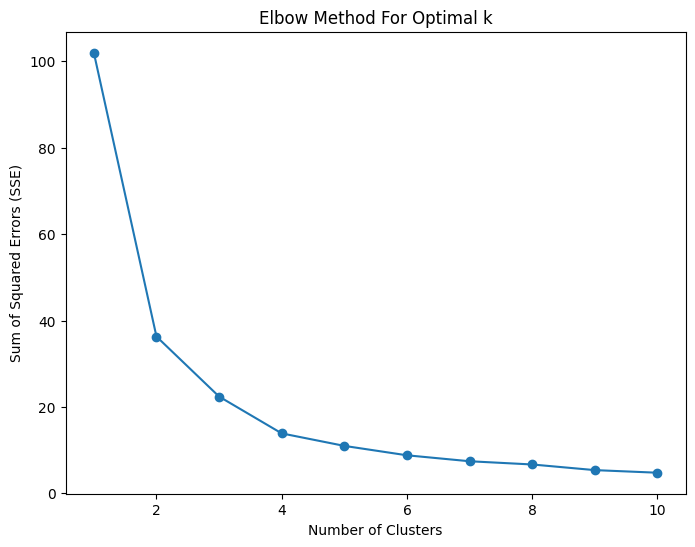

In [14]:
# [Step 12] Draw the SSE Plot
plot_sse(max_clusters=10)

In [15]:
# [Step 11] Print clustering metrics
print("\n\nSSE (Sum of Squared Errors) = %.3f" % kmeans.inertia_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, IDX))



SSE (Sum of Squared Errors) = 22.391
Silhouette Coefficient: 0.554
